## Prinzipien der Visualisierung
Quantitative Daten sind Messwerte die in numerischer Form dargestellt werden.

Zur Visualisierung von quantitativen Daten werden meist Histogramme, Boxplots und Streudiagramme verwendet.

Zur Darstellung in Python kann die `seaborn` Plotting Library verwendet werden. Die nächsten Beispiele werden mit dieser Library und dem Datensatz Titanic (`titanic.csv`) realisiert.

In [2]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
    
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

In [3]:
# Load the dataset in Python and drop N/A values to make plot function calls simpler
# Use seaborn github dataset: ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)
# Load dataset locally
ti = pd.read_csv('../datasets/titanic-seaborn.csv').dropna().reset_index(drop=True)
# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
# df_interact(ti)

In [4]:
# HIDDEN
# Enable R in Python notebook
%load_ext rpy2.ipython

In [5]:
%%R
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)

In [6]:
%%R
# Load the dataset in R and drop N/A values to make plot function calls simpler
ti <- read.csv("../datasets/titanic-seaborn.csv", header = TRUE, sep=",")
# Delete rows with empty values
# Source: https://stackoverflow.com/questions/9126840/delete-rows-with-blank-values-in-one-particular-column
ti <- ti[!(is.na(ti$survived) | is.na(ti$pclass) | ti$deck=="" |
           ti$sex=="" | is.na(ti$age) | is.na(ti$sibsp) | is.na(ti$parch) |
           is.na(ti$fare) | ti$class=="" | ti$who=="" | ti$embarked=="" |
           ti$adult_male=="" |  ti$embark_town==""), ] 

# Calculate confidence interval: https://www.cyclismo.org/tutorial/R/confidence.html
ci <- function(x) {
    qnorm(0.975)*sd(x)/sqrt(length(x))
}

# Plot only text
# Source: https://stackoverflow.com/a/19920666/12347616
ptext <- function(text) {
    out <- toString(text)
    par(mar = c(0,0,0,0))
    plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
    text(x = 0.5, y = 0.5, paste(out), cex = 1.6, col = "black")
    par(mar = c(5, 4, 4, 2) + 0.1)
}

### Histogramme
Histogramme eignen sich gut um Verläufe von Häufigkeitsverteilungen zu visualisieren. Der Datensatz der Titanic enthält für jeden Passagier eine Zeile mit Informationen, darunter auch das Alter. Somit kann man eine Verteilung des Alters der Passagiere erstellen.

Man erkennt keine grundlegenden Unterschiede zwischen männlichen und weiblichen Passagiren, jedoch erkennt man, dass die teuersten Tickets von Männern gekauft wurden.

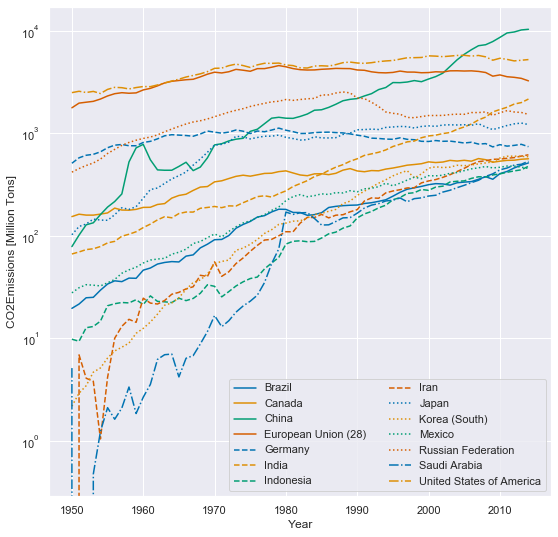

In [28]:
# HIDDEN
co2 = pd.read_csv("../datasets/CAITcountryCO2.csv", skiprows = 2,
                  names = ["Country", "Year", "CO2"])
last_year = co2.Year.iloc[-1]
q = f"Country != 'World' and Country != 'European Union (15)' and Year == {last_year}"
top14_lasty = co2.query(q).sort_values('CO2', ascending=False).iloc[:14]
top14 = co2[co2.Country.isin(top14_lasty.Country) & (co2.Year >= 1950)]

from cycler import cycler

linestyles = (['-', '--', ':', '-.']*3)[:7]
colors = sns.color_palette('colorblind')[:4]
lines_c = cycler('linestyle', linestyles)
color_c = cycler('color', colors)

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_prop_cycle(lines_c * color_c)

x, y ='Year', 'CO2'
for name, df in top14.groupby('Country'):
    ax.semilogy(df[x], df[y], label=name)

ax.set_xlabel(x)
ax.set_ylabel(y + "Emissions [Million Tons]")
ax.legend(ncol=2, frameon=True);